# Data Manipulation

**Prof. Michele Scarpiniti**


## Outline

- [Introduction](#Introduction)
- [Pandas](#Pandas)
- [Data formats](#Data_formats)
- [Useful file formats](#File_formats)

## Introduction <a id="Introduction"></a>

The previous lessons have been addressed toward the basics of **Python** language, such as declaring variables, importing modules and writing some codes that use `if` statement or `for` and `while` loops. In addition, three well-known and useful libraries (**NumPy**, **MatPlotLib**, and **SciPy**) have been introduced in order to enlarge the Python functionalities.

In this lesson, the **focus** will be moved towards **Pandas**: a library for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical **tables** and **time series**.

Finally, in the last part of the lesson, we introduce the **most** used datasets for didactic purposes and **where** we can download them and other useful datasets to test the developed models.


## Pandas <a id="Pandas"></a>


**Pandas** (available at <https://pandas.pydata.org>) is a fast, powerful, flexible, and easy to use open source data analysis and manipulation tool. Its **objects** can be thought of as an enhanced version of **NumPy** structured arrays in which the rows and columns are **identified** with labels rather than simple integer indices.

To **load** the pandas package and start working with it, **import** the package:

In [1]:
import pandas as pd

The community agreed **alias** for pandas is `pd`, so loading pandas as `pd` is assumed standard practice for all of the pandas documentation and related books.


### Data types and basic operations


#### Pandas Series

The two primary data structures of Pandas, **Series** (1-dimensional) and **DataFrame** (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering.

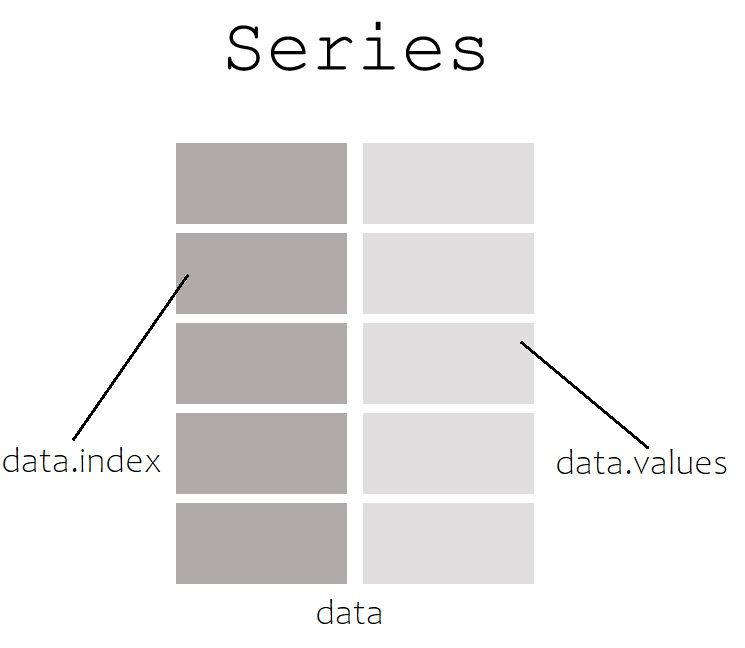

A Pandas Series is a one-dimensional array of indexed data. It can be created from a list or array as follows:

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

As we see in the preceding output, the Series wraps both a sequence of values and a sequence of indices, which we can access with the **values** and **index** attributes.

The values are simply a familiar **NumPy** array:

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The index is an array-like object of type `pd.Index`:

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

Like with a **NumPy** array, data can be accessed by the associated index via the familiar Python **square-bracket** notation:


In [5]:
data[1]

0.5

In [6]:
data[1:3]

1    0.50
2    0.75
dtype: float64

Note that the **slice** operation slices also the index.

However, the basic general to create a Series is to **call**:

In [7]:
index = range(4)
s = pd.Series(data, index=index)
s

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

The passed index is a list of axis labels:

In [8]:
import numpy as np

s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.806609
b    1.317958
c   -1.834228
d   -0.200110
e   -0.354927
dtype: float64

An index can be used to **access** the related **item**(using also slicing):

In [9]:
s['b']

1.3179581714208202

Series can be instantiated from `dicts`:

In [10]:
d = {'b': 1, 'a': 0, 'c': 2}

pd.Series(d)

b    1
a    0
c    2
dtype: int64

If an index is passed, the values in data corresponding to the labels in the index will be pulled out. `NaN`(not a number) is the standard missing data marker used in Pandas:

In [11]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

To recap, item in a Pandas Series can be accessed by an **explicit indexing**(by the name of the indices, e.g., `s['a':'c']`) or by an **implicit indexing** (by the index positional value, e.g., `s[1:3]`).

This can be cause of **confusion**, especially when we set numerical indices that can be confused with their positional values (the index **3** could not be necessary the third one!).
To avoid such confusion, we can use two indexers:
1. `loc`, which uses the explicit indexing:

In [12]:
s.loc['b']

1.3179581714208202

2. `iloc`, which uses the implicit indexing:

In [13]:
s.iloc[1]

1.3179581714208202

#### Pandas DataFrame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or a table.

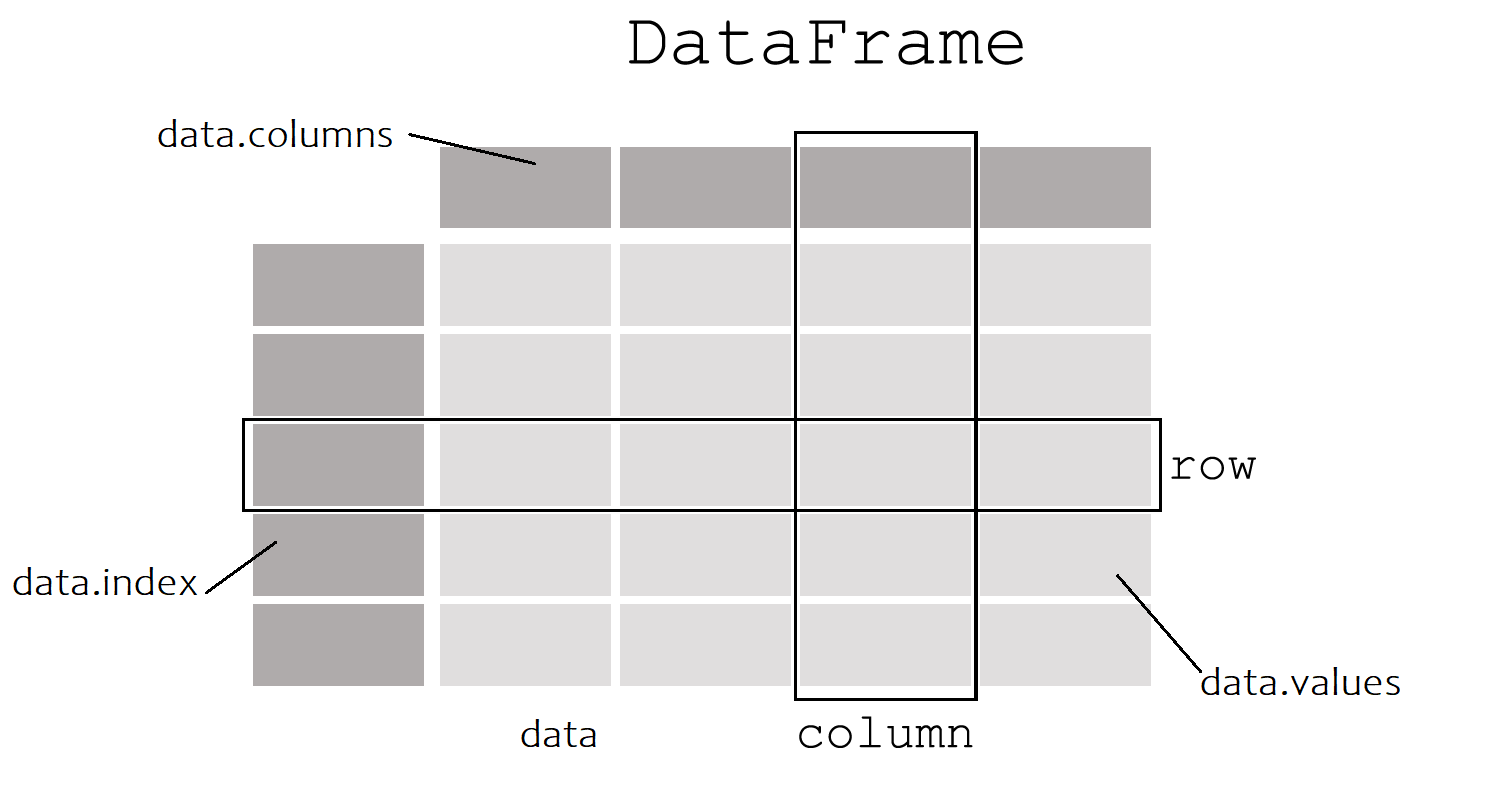



If a `Series` is an analog of a one-dimensional array with flexible indices, a `DataFrame` is an analog of a two-dimensional array with both flexible row indices and flexible column names.

A DataFrame can be constructed from Series, by constructing a dictionary of Series. 

The resulting index will be the **union** of the indexes of the various Series:

In [14]:
d1 = pd.Series([1., 2., 3.], index=['a', 'b', 'c'])
d2 = pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
d3 = pd.Series([1., 2., 4.], index=['a', 'b', 'd'])

d = {'one': d1, 'two': d2, 'three': d3}
df = pd.DataFrame(d)
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,2.0
c,3.0,3.0,NaN
d,NaN,4.0,4.0


A DataFrame can be also constructed from a two-dimensional NumPy array:

In [15]:
data = np.random.rand(3, 2)
df2 = pd.DataFrame(data, columns=['One', 'Two'], index=['a', 'b', 'c'])
df2

,One,Two
a,0.879371,0.268039
b,0.543932,0.335809
c,0.850260,0.571843


The index names, column names, and data values can be retrieved by using:

In [16]:
df2.index

Index(['a', 'b', 'c'], dtype='object')

In [17]:
df2.columns

Index(['One', 'Two'], dtype='object')

In [18]:
df2.values

array([[0.87937116, 0.26803914],
       [0.5439324 , 0.33580928],
       [0.85025987, 0.57184281]])

A Pandas DataFrame **column** can be obtained by addressing the column name:

In [19]:
df['two']

a    1.0
b    2.0
c    3.0
d    4.0
Name: two, dtype: float64

This is equivalent also to:

In [20]:
df.two

a    1.0
b    2.0
c    3.0
d    4.0
Name: two, dtype: float64

A DataFrame **row** can be obtained by **slicing** the row index or name:

In [21]:
df[1:3]  # or df['b':'c']

,one,two,three
b,2.0,2.0,2.0
c,3.0,3.0,NaN


**Attention!** While **indexing** refers to columns, **slicing** refers to rows.

This is more evident if both indexes and columns names are **numbers**:

In [22]:
data = np.random.rand(3, 2)
df3 = pd.DataFrame(data)
df3

,0,1
0,0.514196,0.490858
1,0.244794,0.354064
2,0.965425,0.556794


In [23]:
df3[1]

0    0.490858
1    0.354064
2    0.556794
Name: 1, dtype: float64

In [24]:
df3[1:2]

,0,1
1,0.244794,0.354064


Also for a DataFrame we can use an **explicit** or by an **implicit** indexing. We can use three indexers:
1. `loc`, which uses the explicit indexing:

In [25]:
df.loc[['a', 'b']]

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,2.0


2. `iloc`, which uses the implicit indexing:

In [26]:
df.iloc[[1, 2]]

,one,two,three
b,2.0,2.0,2.0
c,3.0,3.0,NaN


3. `iat`, which accesses a single value for a row/column pair by integer position:

In [27]:
df.iat[1, 2]

2.0

Finally, `loc` and `iloc` can be used also to extract some sub-matrix from the DataFrame, by addressing suitable rows and/or columns:

In [28]:
df.loc[:'b',:'two']

,one,two
a,1.0,1.0
b,2.0,2.0


In [29]:
df.iloc[:3,:2]

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0


Any of these indexing conventions may also be used to set or modify values, link in NumPy:

In [30]:
df.iloc[0, 1] = 5
df

,one,two,three
a,1.0,5.0,1.0
b,2.0,2.0,2.0
c,3.0,3.0,NaN
d,NaN,4.0,4.0


### Essential basic functionality

To view a small sample of a Series or DataFrame object, use the `head()` and `tail()` methods. The default number of elements to display is **five**, but you may pass a custom number:

In [31]:
long_series = pd.Series(np.random.randn(1000))

long_series.head()

0   -0.226273
1    1.014028
2    0.565425
3   -0.498415
4    0.263839
dtype: float64

In [32]:
long_series.tail(3)

997   -1.179415
998   -0.948278
999   -0.279851
dtype: float64

Given the following DataFrame object:

In [33]:
index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

,A,B,C
2000-01-01,-1.188430,-0.499166,0.518637
2000-01-02,0.140627,-0.326828,-0.574089
2000-01-03,0.771545,-0.650965,-0.604894
2000-01-04,-0.477709,-1.166641,2.056014
2000-01-05,-1.030212,0.825205,1.095470
2000-01-06,1.061901,0.099393,-1.540692
2000-01-07,0.380875,1.078967,-2.724278
2000-01-08,-0.682946,-0.029161,-0.036509


Hence, we can use some attributes to access the metadata and safely **assign** to variables. For example, we convert to lowercase row variables:

In [34]:
df[:2]

,A,B,C
2000-01-01,-1.188430,-0.499166,0.518637
2000-01-02,0.140627,-0.326828,-0.574089


In [35]:
df.columns = [x.lower() for x in df.columns]
df[:5]

,a,b,c
2000-01-01,-1.188430,-0.499166,0.518637
2000-01-02,0.140627,-0.326828,-0.574089
2000-01-03,0.771545,-0.650965,-0.604894
2000-01-04,-0.477709,-1.166641,2.056014
2000-01-05,-1.030212,0.825205,1.095470


If you know you need a **NumPy** array, use `to_numpy()` or `numpy.asarray()` functions:

In [36]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

s.to_numpy()

array([-1.04204346,  0.06597607, -0.11313893,  0.37544768,  1.05391031])

In [37]:
np.asarray(s)

array([-1.04204346,  0.06597607, -0.11313893,  0.37544768,  1.05391031])

DataFrame has the methods `add()`, `sub()`, `mul()`, `div()` for carrying out element-wise summation, subtraction, multiplication, and division:

In [38]:
df = pd.DataFrame({
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})
				
row = df.iloc[1]
column = df['two']

df.sub(row, axis='columns')

,one,two,three
a,-0.156870,-1.098450,NaN
b,0.000000,0.000000,0.000000
c,-1.758807,-0.553476,0.019411
d,NaN,2.567030,-0.338151


In [39]:
df.sub(column, axis='index')

,one,two,three
a,1.114004,0.0,NaN
b,0.172424,0.0,0.501475
c,-1.032907,0.0,1.074362
d,NaN,0.0,-2.403706


#### Basic iterations

The behavior of basic iteration over pandas objects depends on the type. When iterating over a Series, it is regarded as array-like, and basic iteration produces the values. DataFrames follow the dict-like convention of iterating over the *keys* of the objects.

In short, basic iteration (`for i in object`) produces:

* Series: values
	
* DataFrame: column labels

Thus, for example, **iterating** over a DataFrame gives the column names:

In [40]:
df = pd.DataFrame({'col1': np.random.randn(3), 'col2': np.random.randn(3)}, index=['a', 'b', 'c'])
for col in df:
    print(col)

col1
col2


Pandas objects have also methods: `items()` to iterate over the (key, value) pairs and `iterrows()` to iterate over the rows as (index, Series) pairs.


### Basic data manipulations


#### Reading and writing data

Pandas provides the `read_csv()` function to **read** data stored as a CSV file into a Pandas DataFrame. Pandas supports many different file formats or data sources (csv, excel, sql, json, parquet, ...).

To **load** the titanic passenger data, available as a CSV file:

In [41]:
titanic = pd.read_csv("../data/titanic.csv")

The equivalent read function for Excel data:


In [42]:
titanic = pd.read_excel('../data/titanic.xlsx', sheet_name='passengers')

The `header=None` option **avoid** to read the column names, while with the `sep` option we can specify the delimiter used to separate values in the file.

In order to **write** data to CSV file:

In [43]:
titanic.to_csv('../data/titanic_new.csv', index=False)

Similarly, to **write** data to Excel file:

In [44]:
titanic.to_excel('../data/titanic_new.xlsx', sheet_name='passengers', index=False)

The `index=False` option **does not** write the row names in the file.


#### Select a subset of a DataFrame

To **select** a single column, use square brackets `[ ]` with the column name of the column of interest:

In [45]:
titanic = pd.read_csv("../data/titanic.csv")

ages = titanic["Age"]
ages

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [46]:
age_sex = titanic[["Age", "Sex"]]
age_sex

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


As a single column is selected, the returned object is a Pandas DataFrame. 

To select multiple columns, use a **list** of column names within the selection brackets `[ ]`. The returned data type is a Pandas DataFrame.


To **select** rows based on a conditional expression, it suffices to use a condition **inside** the selection brackets `[ ]`:

In [47]:
above_35 = titanic[titanic["Age"] > 35]
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]

The condition *inside* the selection brackets `titanic["Age"] > 35` checks for which rows the Age column has a value **larger** than 35. All the others conditions (\$ >=, \$ ==, \$ !=, \$ <, \$ <=) can be used. 

When **combining** multiple conditional statements, each condition must be surrounded by parentheses `()`. Moreover, you can not use or/and but need to use the **or** operator `|` and the **and** operator `&`.


It is also possible to:
* **select** specific rows and/or columns using `loc` when using the row and column names;
	
* **select** specific rows and/or columns using `iloc` when using the positions in the table;
	
* **assign** new values to a selection based on `loc`/`iloc`.


In [48]:
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
some_passengers = titanic.iloc[9:25, 2:5]
titanic.iloc[0:3, 3] = "anonymous"

#### Deleting some rows or columns

In order to **delete** a row or a column(or both) from a DataFrame, you can use:

In [49]:
# Removing two specified columns
new_df1 = titanic.drop(['Age', 'Sex'], axis=1) 

# Removing two specified rows
new_df2 = titanic.drop([0, 1], axis=0)

# Removing both a row and a column
new_df3 = titanic.drop(index=20, columns='Sex')

#### Creating new columns derived from existing columns

It is possible to **create** new column by performing mathematical operation between other columns or by renaming the columns:

In [50]:
table = pd.read_csv("../data/mydata.csv")
table["col4"] = table["col1"] * 1.882
table["col5"] = table["col2"] / table["col3"]

table_new = table.rename(
  columns={"col1": "BETR801",
           "col2": "FR04014",
           "col3": "Roma"})

table_new

,BETR801,FR04014,Roma,col4,col5
0,0.844548,1.468936,0.882553,1.589439,1.664417
1,-0.226764,-1.546553,0.501065,-0.426770,-3.086532
2,1.172823,0.445329,-0.304587,2.207253,-1.462075
3,0.663638,-1.228805,0.543703,1.248967,-2.260067
4,-0.060712,-1.917687,-1.148560,-0.114260,1.669645
5,0.803664,-1.823464,-0.563253,1.512496,3.237380
6,1.318961,0.516707,-0.970342,2.482285,-0.532500
7,0.322948,-1.227461,0.343019,0.607788,-3.578405


#### Evaluating summary statistics

One powerful characteristics is the ability of **evaluating** aggregating statistics, also grouped:

In [51]:
titanic = pd.read_csv("../data/titanic.csv")

titanic["Age"].mean()

29.69911764705882

In [52]:
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [53]:
titanic.agg({'Age': ['min', 'max', 'median', 'skew'],
            'Fare': ['min', 'max', 'median', 'mean']})

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


In [54]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [55]:
titanic["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

The `groupby` operation allows to make **aggregation** conditionally on some label or index.

The aggregating statistic can be calculated for multiple columns at the same time by using the `describe` function:

In [56]:
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


#### Sorting and reshaping

If we are interested in **sorting** values in a DataFrame:

In [57]:
titanic.sort_values(by="Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [58]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C


In [59]:
table_subset = titanic.sort_index().groupby(["Pclass"])
table_subset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S


#### Combining data from multiple tables

A very common operation is to **combine** two tables with a similar structure, in a single table:

In [60]:
no2_data = pd.read_csv("../data/air_quality_no2_long.csv")
pm25_data = pd.read_csv("../data/air_quality_pm25_long.csv")

air_quality = pd.concat([pm25_data, no2_data], axis=0)
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


By default concatenation is along `axis 0`, so the resulting table combines the rows of the input tables. In order to combine the columns, we have to use `axis 1`:

In [61]:
air_quality = pd.concat([pm25_data, no2_data], axis=1)
air_quality.head()

,city,country,date.utc,location,parameter,value,unit,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


We can make plot of data contained in Pandas Series and DataFrame by using **directly** some methods of Pandas, without explicitly calling the Matplotlib. 

To this purpose, we can use the `plot` method of Pandas, selecting the type of desired graphic with the `kind` parameter (by default is `line`, the classical plot):

<Axes: >

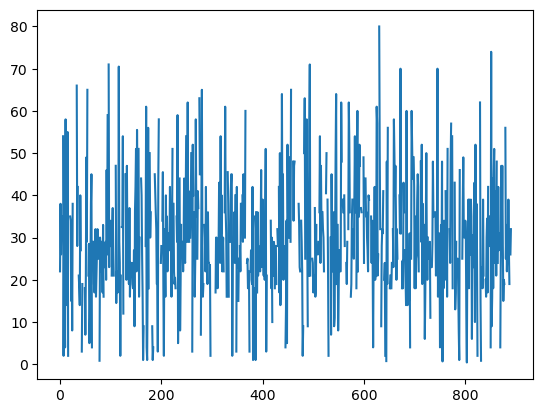

In [62]:
titanic['Age'].plot()

<Axes: >

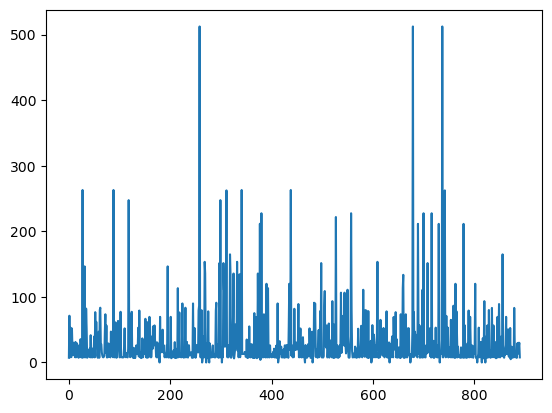

In [63]:
titanic['Fare'].plot(kind='line')

<Axes: >

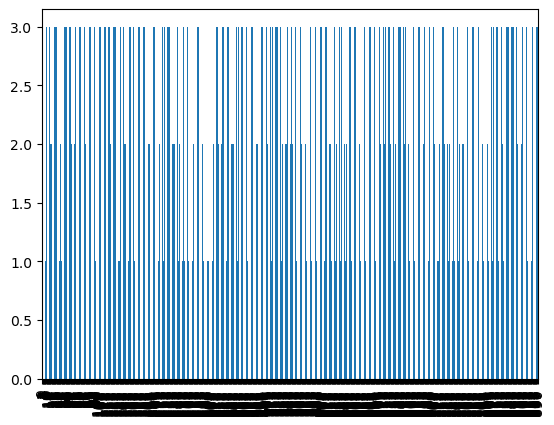

In [64]:
titanic['Pclass'].plot(kind='bar')

<Axes: ylabel='Frequency'>

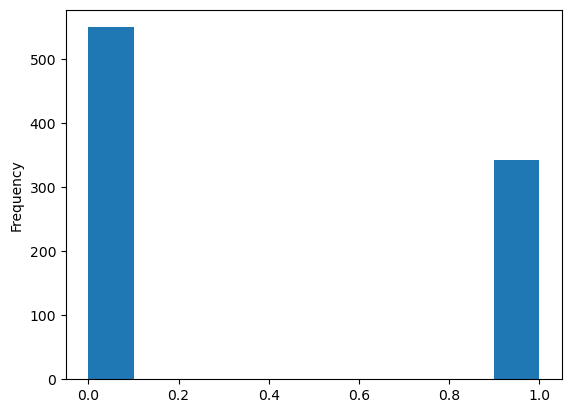

In [65]:
titanic['Survived'].plot(kind='hist')

<Axes: xlabel='Pclass', ylabel='Fare'>

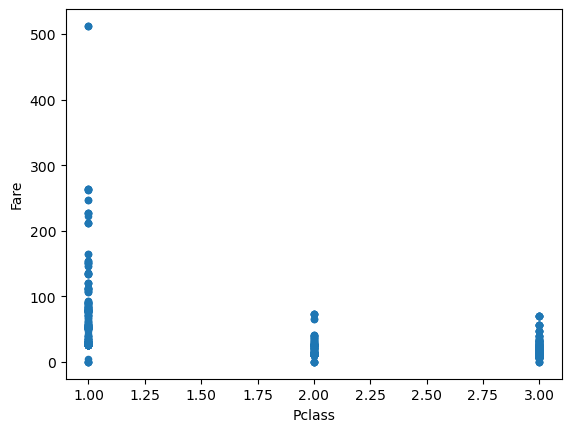

In [66]:
titanic.plot(x='Pclass',y='Fare',kind='scatter')

#### Manipulating textual data

When tables contain textual data, it becomes very important to handle some useful functions able to manipulate text.

One procedure is to make all name characters **lowercase**:

In [67]:
titanic = pd.read_csv("../data/titanic.csv")
titanic["Name"].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

When there are names separated by a comma, it is possible to **extract** the part before the comma and **create** a **new** column:

In [68]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
titanic["Surname"]

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Surname, Length: 891, dtype: object

The `str.get()` method extract a string in position `0` in the Series`Name`.

If we are interested in **extracting** some data that **contains** a specific word, we can apply:

In [69]:
idx = titanic["Name"].str.contains("Countess")
passengers = titanic[idx]
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


The string method `str.contains()` checks for each of the values in the column `Name` if the string contains the word `Countess` and **returns** for each of the values **True** (`Countess` is part of the name) or **False** (`Countess` is not part of the name). This output can be used to sub-select the data using conditional (*boolean*) indexing.

It is possible to **replace** some word values with others:

In [70]:
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M", "female": "F"})
titanic["Sex_short"]

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: Sex_short, Length: 891, dtype: object

#### Handling missing data

A number of schemes have been developed to indicate the **presence** or **missing** data in a table or DataFrame. Fundamentally, there are **two** ways to handle missing data. 

The first sentinel value used by Pandas is `None`, a Python singleton object that is often used for missing data in Python code. Because `None` is a Python object, it cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type `object`. For example:

In [71]:
import numpy as np

v1 = np.array([1, None, 3, 4])
print(v1)

[1 None 3 4]


The other missing data representation, `NaN` (acronym for *Not a Number*), is a special floating-point value:

In [72]:
v2 = np.array([1, np.nan, 3, 4])
print(v2)

[ 1. nan  3.  4.]


Regardless of the operation, the result of arithmetic with `NaN` will be another `NaN`.

`NaN` and `None` both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [73]:
v3 = pd.Series([1, np.nan, 2, None])
v3

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

There are several useful methods for detecting, removing, and replacing null values in Pandas data structures:
* `isnull()`: generate a Boolean mask indicating missing values
* `notnull()`: opposite of `isnull()`
* `dropna()`: return a filtered version of the data
* `fillna()`: return a copy of the data with missing values**filled** or **imputed**
* 
For example, we can **fill** the missing value in a Panda Series with **0**:

In [74]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))

data_new = data.fillna(0)
data_new

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

For **counting** the number of missing values in a DataFrame, we can use a double `sum()` command after the `isnull()`, since this last returns a binary mask:

In [75]:
N = titanic.isnull().sum().sum()
print(N)

866


Hence, we can decide removing the rows or the columns containing missing values:

In [76]:
titanic1 = titanic.dropna()
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Sex_short
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,F
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,M
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,F
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Bonnell,F


In [77]:
titanic2 = titanic.dropna(axis='columns')
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Surname,Sex_short
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Braund,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,Cumings,F
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Heikkinen,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,Futrelle,F
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Allen,M


## Data formats <a id="Data_formats"></a>


### Data representation


A **dataset** is a collection of instances or examples that collect a number of descriptors(**features**) that characterize the current instance.

A table layout makes clear that the information can be **split** into two subsets. The first is a two-dimensional numerical array or matrix, which we will call the features matrix. By convention, this features matrix is often stored in a variable named `X`. The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy array or a Pandas DataFrame.

In addition to the feature matrix `X`, we also generally work with a label or target array, which by convention we will usually call `y`. The target array is usually one dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas Series. The target array may have continuous numerical values, or discrete classes/labels.


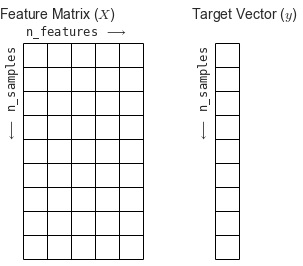


Note that the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to **predict** from the data: in statistical terms, it is the **dependent** variable.


### The Iris dataset

A well known data-set is the **Iris** one, which dates back to seminal work by the eminent statistician R.A. Fisher in the mid-1930s and is arguably the most famous data-set used in machine learning, contains 50 examples each of **three** types of plant: *Iris setosa*, *Iris versicolor*, and *Iris virginica*. 

There are four attributes: *sepal length*, *sepal width*, *petal length*, and *petal width* (all measured in centimeters). All attributes have values that are **numeric**.


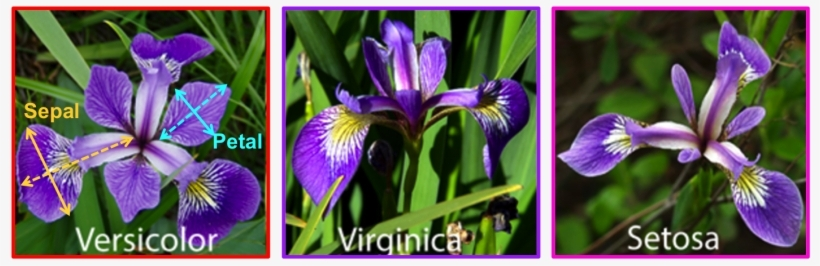

An excerpt of the **Iris** data-set is shown in the following table.

| **N.** | **Sepal Length** | **Sepal Width** | **Petal Length** | **Petal Width** | **Type**            |
|:-------|:----------------:|:---------------:|:----------------:|:---------------:|:--------------------|
| 1      |  5.1             |  3.5            |  1.4             |  0.2            |  *Iris setosa*      |
| 2      |  4.9             |  3.0            |  1.4             |  0.2            |  *Iris setosa*      |
| 3      |  4.7             |  3.2            |  1.3             |  0.2            |  *Iris setosa*      |
| 4      |  4.6             |  3.1            |  1.5             |  0.2            |  *Iris setosa*      |
| 5      |  5.0             |  3.6            |  1.4             |  0.2            |  *Iris setosa*      |
| ...    |                  |                 |                  |                 |   ...               |
| 51     |  7.0             |  3.2            |  4.7             |  1.4            |  *Iris versicolor*  |
| 52     |  6.4             |  3.2            |  4.5             |  1.5            |  *Iris versicolor*  |
| 53     |  6.9             |  3.1            |  4.9             |  1.5            |  *Iris versicolor*  |
| 54     |  5.5             |  2.3            |  4.0             |  1.3            |  *Iris versicolor*  |
| 55     |  6.5             |  2.8            |  4.6             |  1.5            |  *Iris versicolor*  |
| ...    |                  |                 |                  |                 |   ...               |
| 101    |  6.3             |  3.3            |  6.0             |  2.5            |  *Iris virginica*   |
| 102    |  5.8             |  2.7            |  5.1             |  1.9            |  *Iris virginica*   |
| 103    |  7.1             |  3.0            |  5.9             |  2.1            |  *Iris virginica*   |
| 104    |  6.3             |  2.9            |  5.6             |  1.8            |  *Iris virginica*   |
| 105    |  6.5             |  3.0            |  5.8             |  2.2            |  *Iris virginica*   |
| ...    |                  |                 |                  |                 |   ...               |


### The MNIST dataset

The **MNIST** dataset (Modified National Institute of Standards and Technology) is a large collection of *handwritten digits*. It has a training set of 60,000 examples, and a test set of 10,000 examples. All images are $28 \times 28$ pixel size in gray-scale levels ($[0, \, 255]$). Each example is a **vector** of $28 \times 28 = 784$ entries.


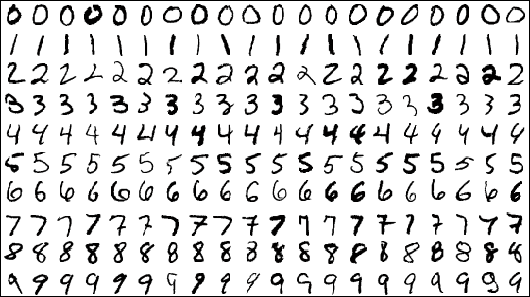

### The CPU dataset

The following table shows, instead, a data-set suitable for the regression problem. It is related to the performance of a **CPU** on the basis of six relevant attributes, for a total of 209 instances.

| **N.** | **MYCT** | **Mmin** | **Mmax** | **CACH** | **CHmin** | **CHmax** | **PRP** |
|:------:|:--------:|:--------:|:--------:|:--------:|:---------:|:---------:|:-------:|
| 1      |  125     |  256     |  6000    |  256     |   16      |  128      | 198     |
| 2      |   29     | 8000     | 32000    |   32     |    8      |   32      | 269     |
| 3      |   29     | 8000     | 32000    |   32     |    8      |   32      | 220     |
| 4      |   29     | 8000     | 32000    |   32     |    8      |   32      | 172     |
| 5      |   29     | 8000     | 16000    |   32     |    8      |   16      | 132     |
| ...    |          |          |          |          |           |           | ...     |
| 207    |  125     | 2000     |  8000    |    0     |    2      |   14      |  52     |
| 208    |  480     |  512     |  8000    |   32     |    0      |    0      |  67     |
| 209    |  480     | 1000     |  4000    |    0     |    0      |    0      |  45     |


## Loading a dataset

Usually, datasets are available for downloading in **CSV** format. This is a file where data are organized in lines (*examples*) of different values (*features*) separated by a comma. Sometimes, also **other** file formats are available.

We can use Pandas to read this kind of file into a DataFrame. For example, to load the Iris dataset:

In [78]:
import pandas as pd

data = pd.read_csv('../data/iris.csv', header=None)

Otherwise, we can **load** it directly from the online repository:

In [79]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(url, header=None)

After reading the dataset, we have to **select** all the *features* (the first four columns in the DataFrame) and the *class labels* (the last column).

This can be done simply selecting the suitable columns from the DataFrame `data`:

In [80]:
X = data.iloc[:, :4].values
y = data.iloc[:, 4].values

print(X.shape)
print(y.shape)

(150, 4)
(150,)


The `values` is used in order to obtain a NumPy bi-dimensional array for the **features** and a vector for the **labels**.


## Useful file formats <a id="File_formats"></a>

Apart text files, numpy files, csv and excel files, there are many other useful file formats that can be used to pack information.

Among these, we cite the *Hierachical Data Fotmat* (**HDF**), the *JavaScript Object Notation* (**JSON**), and the *eXtensible Markup Language* (**XML**) file formats.

Moreover, it is also possible to save information in a **database** and interact to them by using the **SQL** language.


### Saving generic data

A good practice for reproducibility is to **save** data on the hard disc. 

There are two very simple solutions: using the Python library `pickle` or install and use the `joblib` library. Their use is quite similar. To **save** some data to a file with `pickle`:

In [81]:
import pickle

filename = '../data/my_file.sav'
pickle.dump(data, open(filename, 'wb'))

Then we can **load** the data and use it:

In [82]:
data = pickle.load(open(filename, 'rb'))
# y_pred = model.predict(data)  # E.g., using a model on loaded data

We can use any extension to save the file. However, often the `*.pickle` or `*.pkl` are preferred.

The same can be done in `joblib`:

In [83]:
import joblib

filename = "../data/my_file.joblib"

# Save data
joblib.dump(data, filename)

['../data/my_file.joblib']

In [84]:
# Load data
data = joblib.load(filename)

The `pickle` package is **faster** in saving and loading models, and by default produce smaller files. However, the `joblib` can produce smaller file sizes thanks to **compression**, by further increasing the saving and loading times. 

**Attention!** There is a note in the `pickle` documentation that it can be **insecure**. It is shouldn't be used to load files from untrusted sources, because it can execute malicious code. For example, if you are building online ML service that accepts uploaded models, then you should use `joblib`.


### Saving preprocessed data

Data pre-processing can be a very time consuming task. As a consequence, it could be helpful to **save** preprocessed data on the hard drive and **load** them directly when needed.

The way for saving this data is depending from the specific data type. For example, we can use Pandas to save CSV files. However, we can again use the `pickle` library as done for models.

If data are contained in NumPy arrays, the **best** way is to save them in NumPy format, in three different modalities. If we want to save and load **single** variables:

In [85]:
import numpy as np

np.save('../data/features.npy', X)
np.save('../data/labels.npy', y)

In [86]:
feats  = np.load('../data/features.npy', allow_pickle=True)
labels = np.load('../data/labels.npy', allow_pickle=True)

The `np.save` function saves an array to a binary file in NumPy `*.npy` format.


Similarly, the `np.savez` and `np.savez_compressed` functions save **several** arrays into a single file in uncompressed and compressed `*.npz` format, respectively. In this kind of file a *dictionary-like* object is returned, and we can retrieve data by selecting each variable name:

In [87]:
np.savez('../data/my_data.npz', X=X, y=y)

data = np.load('../data/my_data.npz', allow_pickle=True)
feats  = data['X']
labels = data['y']

If the file is a `*.npz` file, the returned value supports the context manager **protocol** in a similar fashion to the `open` function:

In [88]:
with np.load('../data/my_data.npz') as data:
    X = data['X']

### The HDF5 file format

We can also use the *Hierarchical Data Format* (**HDF5**), which is a container for two kinds of objects: datasets, which are array-like collections of data, and groups, which are folder-like containers that hold datasets and other groups. It can be used as:

In [89]:
import h5py

# Saving data in a HDF5 file
h5f = h5py.File('../data/my_data.h5', 'w')
h5f.create_dataset('X', data=X)
h5f.close()

In [90]:
# Loading data from a HDF5 file
h5f = h5py.File('../data/my_data.h5','r')
feats = h5f['X'][:]
h5f.close()

Remember that we need to **explicitly** close a HDF5 file.


### The JSON file format

The *JavaScript Object Notation* (**JSON**) is a lightweight format for storing and transporting data, it is often used when data is sent from a server to a web page. JSON is "self-describing" and easy to understand. Usually, a *dictionary-like* variable is **serialized** to a JSON object and then saved to a file:

In [91]:
import json

# Data
my_dictionary = {'Name': 'Michele', 'Surname': 'Scarpiniti', 'age': 22}

# Serializing json
json_object = json.dumps(my_dictionary)				

# Writing to JSON file
with open("../data/data.json", "w") as outfile:
    outfile.write(json_object)

and viceversa it can be deserialized:

In [92]:

# Open and read the JSON file
with open("../data/data.json", "r") as infile:
    data = json.load(infile)
				
# Deserializing json
my_dictionary = json.dumps(data)
print(my_dictionary)

{"Name": "Michele", "Surname": "Scarpiniti", "age": 22}


### The XML file format

The *eXtensible Markup Language* (**XML**) is a software- and hardware-independent tool for storing and transporting data. **XML** is just information wrapped in **tags**.

For reading and writing **XML** files it is necessary to use an external package, such as the BeautifulSoup:

In [93]:
from bs4 import BeautifulSoup

# Reading the data inside the xml
with open("../data/note.xml", "r") as infile:
    data = infile.read()

# Extracting data
Bs_data = BeautifulSoup(data, "xml")
print(Bs_data)

<?xml version="1.0" encoding="utf-8"?>
<note>
<to>Tove</to>
<from>Jani</from>
<heading>Reminder</heading>
<body>Don't forget me this weekend!</body>
</note>


In [94]:
# Writing data to an xml file
with open("../data/myfile.xml", "w") as outfile:
    outfile.write(Bs_data.prettify())

The `prettify()` function convert the BeautifulSoup object to a *string*.

## References <a id="References"></a>

1. Jake VanderPlas, Python Data Science Handbook: Tools and Techniques for Developers, Fist Edition, O'Reilly Media, 2016.
2. Wes McKinney, Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython, Second Edition, O'Reilly Media, 2017.
3. Joel Grus, Data Science from Scratch, Second Edition, O'Reilly Media, 2019.
4. Naomi Ceder, The Quick Python Book, Third Edition, Manning, 2018.
5. Naomi Ceder, Python - Guida alla sintassi, alle funzionalità avanzate e all'analisi dei dati, Apogeo, 2019.
